# Data Analyse Infrastructure Automation

In [69]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import os

## Data inlezen en transformeren
#### We beginnen met het inlezen en transformeren van de data in *./data.csv* om er analyse op te kunnen uitvoeren.

In [70]:
df = pd.read_csv('./data.csv')
#replacing , with spaces in column names
df.columns = [col.replace(',',' ') for col in df.columns]

#converting dtypes of columns
def object_to_time(obj):
    return pd.to_datetime(obj,format='%Y%m%d %H%M%S')

df['time'] = df['time'].map(object_to_time)
df['El Rio'] = df['El Rio'].astype('int64')
df.head()

,Bob Express,El Rio,Fury,Indiana River,Mount Mara VR,Naga Bay,Oki Doki,Revolution,Speedy Bob,The Dreamcatcher,Typhoon,Wildwaterbaan,time
0,5,15,20,25,0,15,20,15,35,20,10,5,2022-10-22 14:10:01
1,5,15,20,25,0,15,20,15,35,20,10,5,2022-10-22 14:20:01
2,5,5,20,25,0,15,20,15,35,20,10,5,2022-10-22 14:30:01
3,5,5,20,25,0,15,20,15,35,20,10,5,2022-10-22 14:40:01
4,5,5,20,25,0,15,20,15,35,20,10,5,2022-10-22 14:50:01


De kolommen van de data zijn de namen van de attracties(Bobbejaanland) en de waarden zijn de wachttijden in minuten op dat moment

## Data Analyse
#### We bekijken de basisstatistieken van de data en wat interessante gegevens

In [71]:
print(f'Shape {df.shape}')
print(f"Dataset begon op {df['time'][0]} tot {df['time'][len(df['time'])-1]}")
describe = df.describe()
display(describe)
df = df.drop('Mount Mara VR',axis=1)
describe = describe.drop('Mount Mara VR',axis=1)
print(f"Langste maximale wachttijd ooit: Oki Doki {describe.iloc[7].max()} min")
print(f"Korste maximale wachttijd ooit: Speedy Bob {describe.iloc[7].min()} min")
print(f'Kortste gemiddelde wachttijd: El Rio {describe.iloc[1].min()} min')
print(f'Langste gemiddelde wachttijd: Typhoon {describe.iloc[1].max()} min')
f = open('statistieken.txt','r+')
f.write(f"Langste maximale wachttijd ooit: Oki Doki {describe.iloc[7].max()} min\n")
f.write(f"Korste maximale wachttijd ooit: Speedy Bob {describe.iloc[7].min()} min\n")
f.write(f'Kortste gemiddelde wachttijd: El Rio {describe.iloc[1].min()} min\n')
f.write(f'Langste gemiddelde wachttijd: Typhoon {describe.iloc[1].max()} min\n')

Shape (2035, 13)
Dataset begon op 2022-10-22 14:10:01 tot 2022-11-06 18:00:01


,Bob Express,El Rio,Fury,Indiana River,Mount Mara VR,Naga Bay,Oki Doki,Revolution,Speedy Bob,The Dreamcatcher,Typhoon,Wildwaterbaan
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.0,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000
mean,8.131695,4.870762,13.492383,9.485995,0.0,12.253563,6.485504,10.294840,5.780835,11.528256,16.792629,7.016216
std,13.510379,9.621730,22.529088,16.121868,0.0,19.925243,16.467099,15.491856,10.740440,19.407511,24.635838,12.461000
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,5.000000,20.000000,15.000000,0.0,22.500000,5.000000,15.000000,5.000000,15.000000,30.000000,10.000000
max,76.000000,55.000000,115.000000,70.000000,0.0,116.000000,220.000000,65.000000,50.000000,80.000000,90.000000,75.000000


Langste maximale wachttijd ooit: Oki Doki 220.0 min
Korste maximale wachttijd ooit: Speedy Bob 50.0 min
Kortste gemiddelde wachttijd: El Rio 4.870761670761671 min
Langste gemiddelde wachttijd: Typhoon 16.79262899262899 min


60

We zien al direct dat de attractie Mount Mara VR altijd een wachttijd van 0 had. Op de website van Bobbejaanland kan je vinden dat deze attractie inderdaad gesloten is dus die verwijderen we. Oki Doki heeft de langste wachttijd ooit. De korste maximale wachttijd ligt bij de Speedy Bob. De kortste gemiddelde wachttijd is de El Rio en de langste gemiddelde wachttijd ligt bij de Typhoon.

## Data Visualisatie

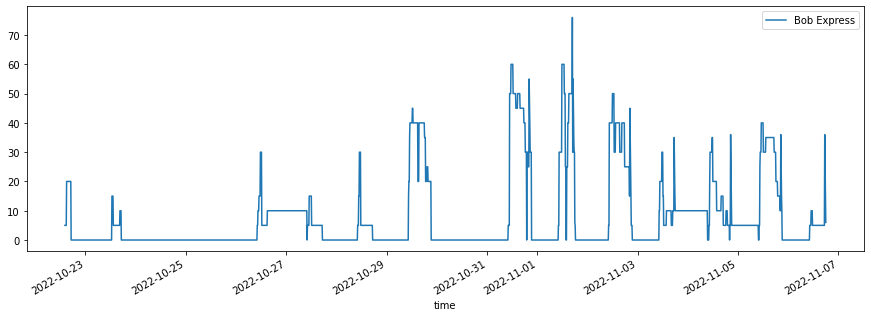

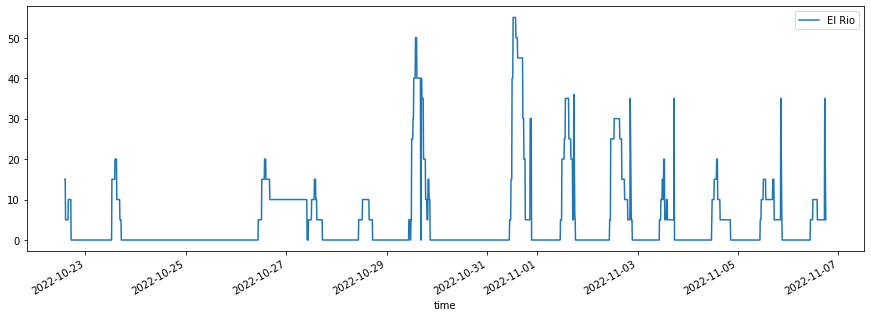

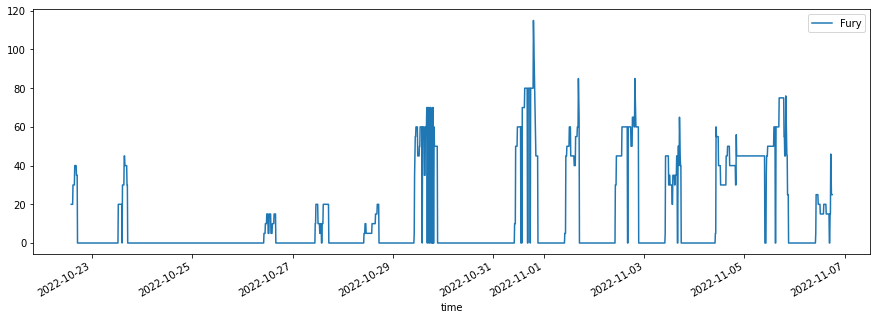

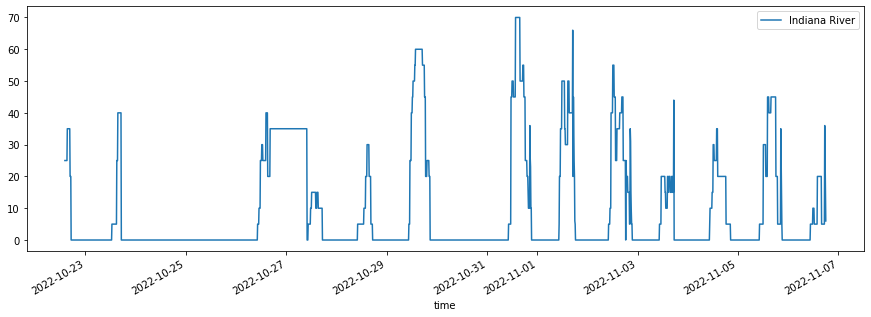

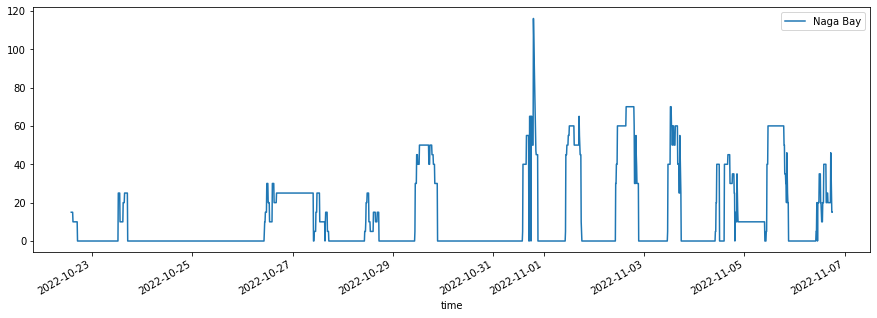

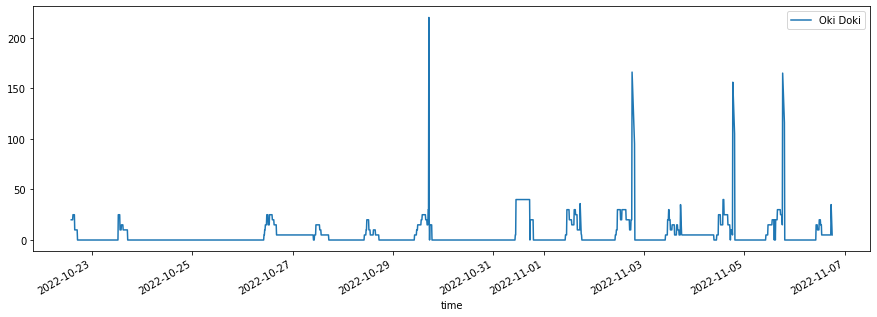

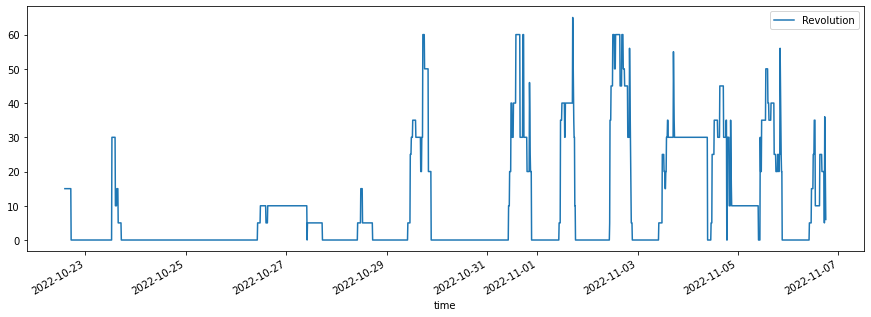

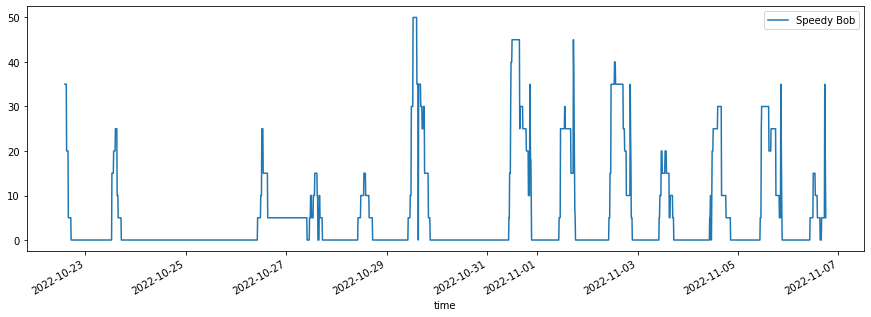

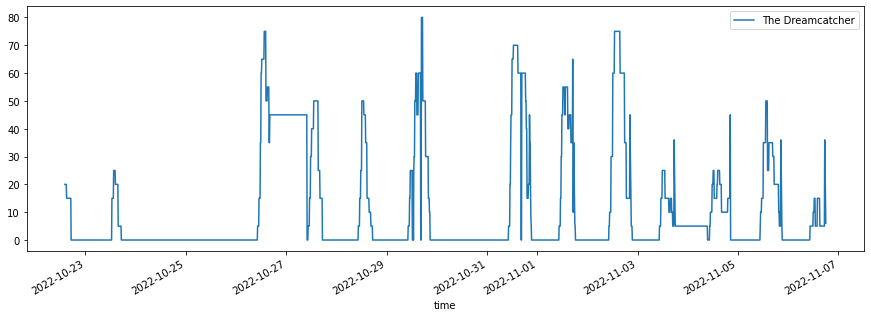

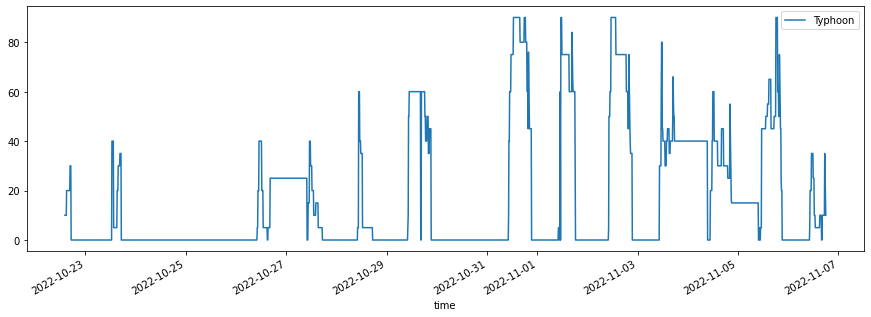

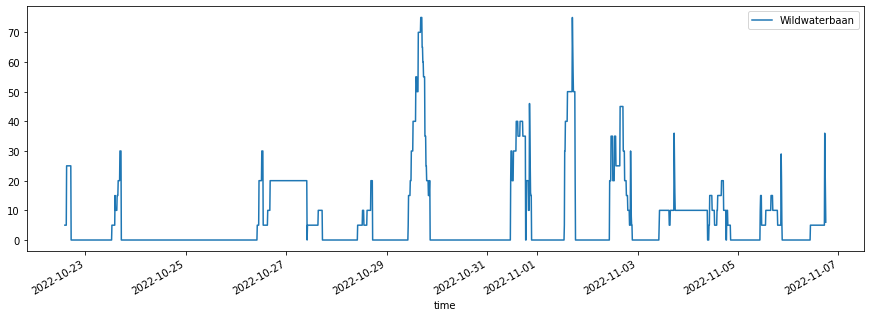

In [79]:
None if os.path.exists('graphs') else os.mkdir('graphs')
for column in df.drop('time',axis=1).columns:
    df.plot(x='time',y=column,kind='line',figsize=(15,5))
    plt.savefig(f'./graphs/{column.replace(" ","_")}.png')
    plt.show()

Bob Express


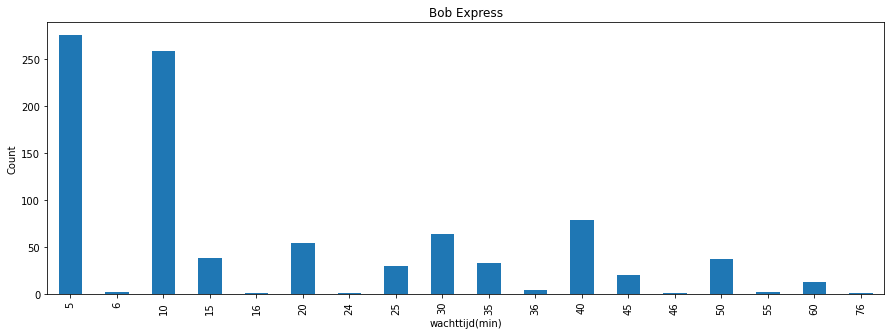

El Rio


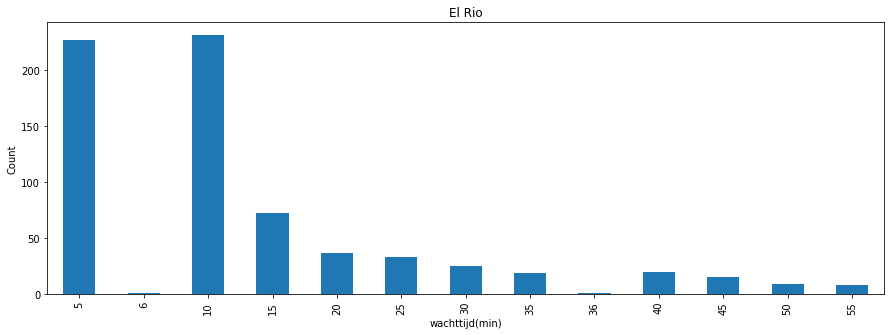

Fury


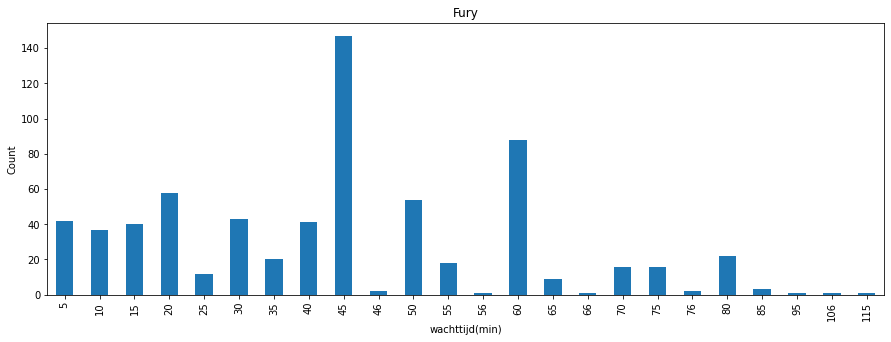

Indiana River


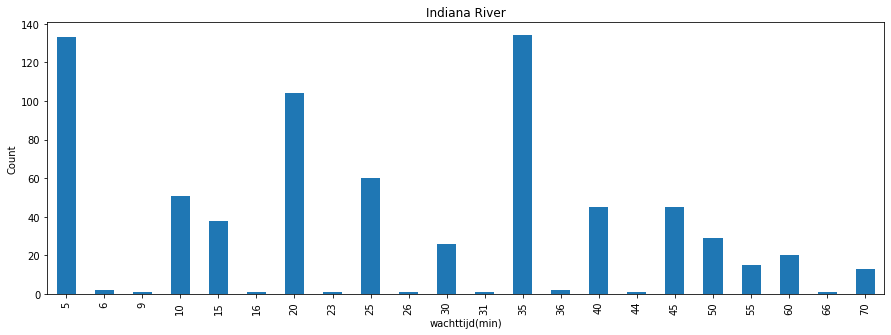

Naga Bay


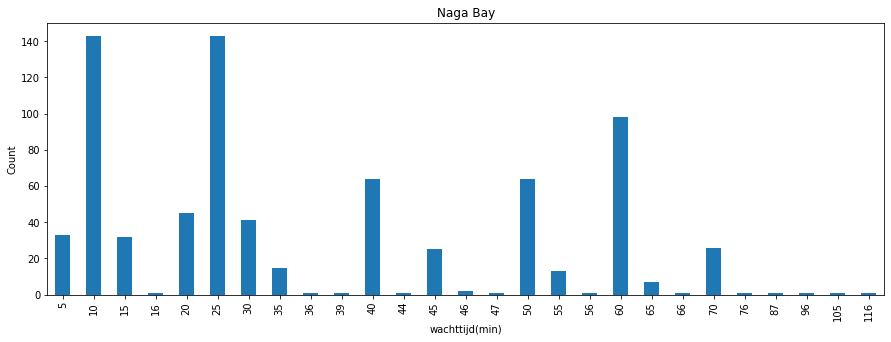

Oki Doki


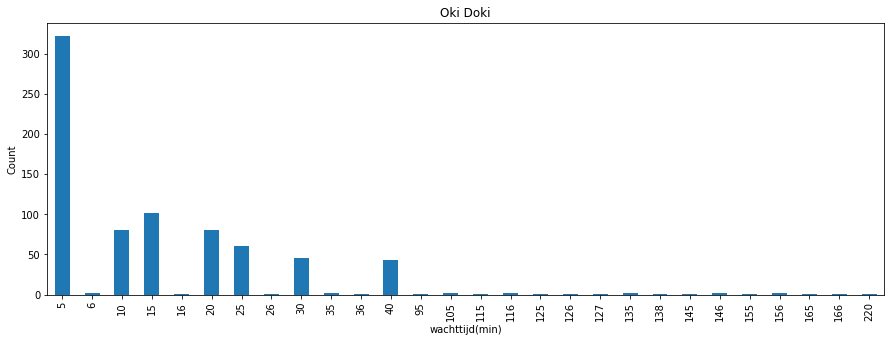

Revolution


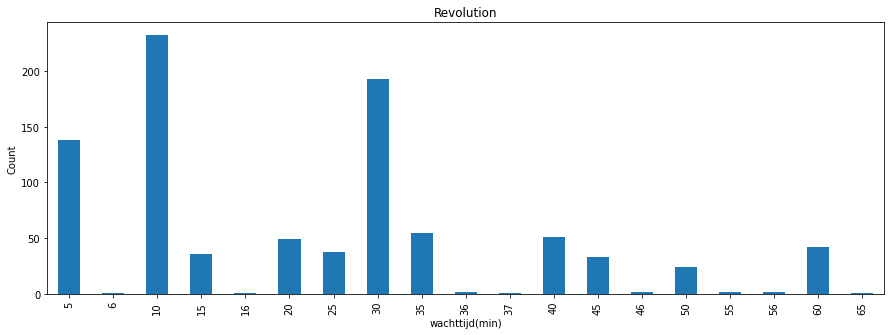

Speedy Bob


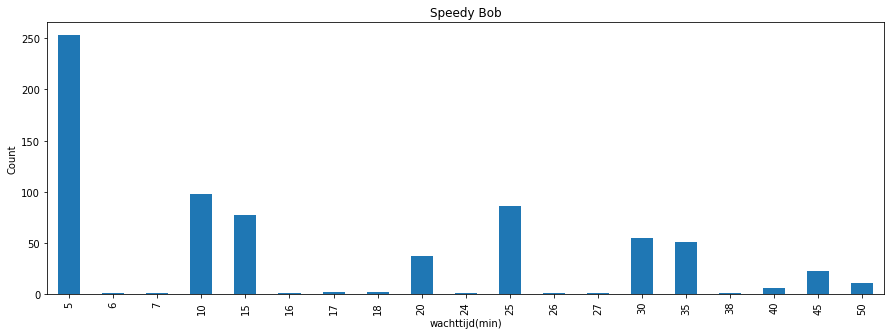

The Dreamcatcher


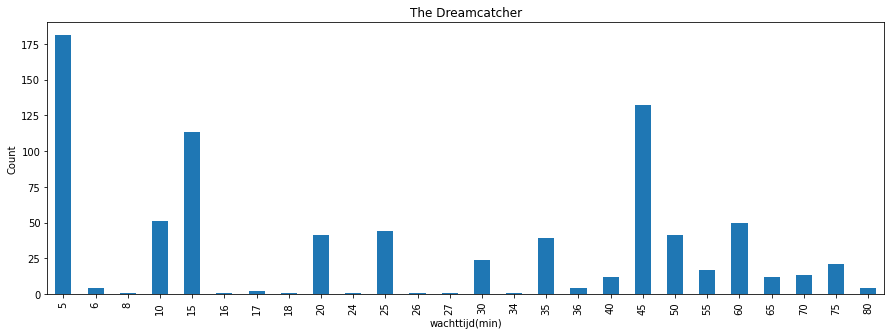

Typhoon


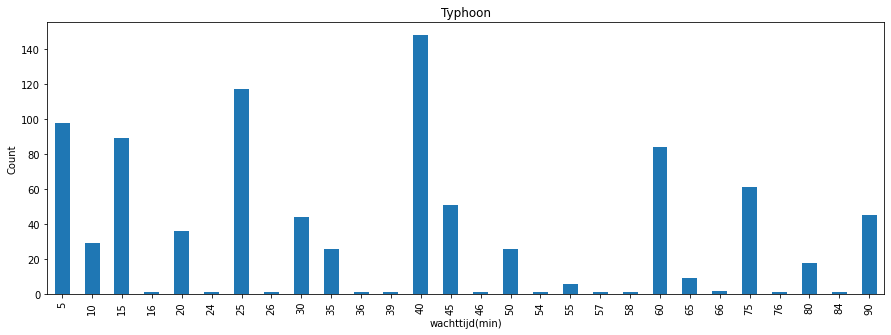

Wildwaterbaan


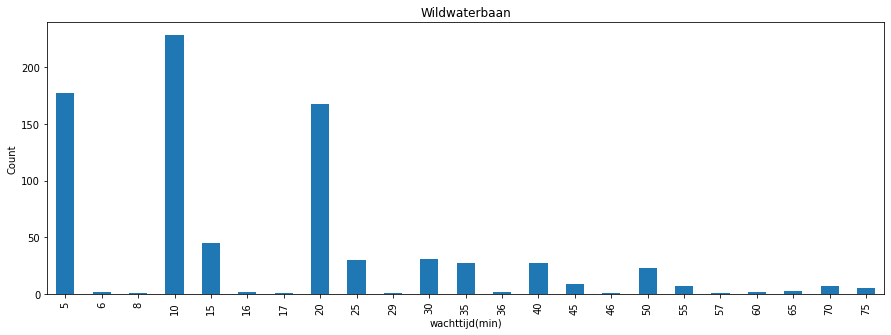

In [73]:
for column in df.drop('time',axis=1).columns:
    print(column)
    df[column][df[column] != 0].value_counts().sort_index().plot(kind='bar',figsize=(15,5),title=column,xlabel='wachttijd(min)',ylabel='Count')
    plt.savefig(f'./graphs/{column.replace(" ","_")}_wt_count.png')
    plt.show()